# Data Analysis of Griefbot with Python                                                      

## Introduction
This notebook consists of the exploratory data analysis of the Griefbot dataset. It includes carrying out various intermediate steps to gain valuable insights from the provided dummy dataset.

## 1 Preparing the data
The first step is to import all the necessary libraries we will be using in this notebook to carry out our analysis.

In [1]:
#Importing the necessary libraries
import pandas as pd       #helps in opening csv files, good for data analysis and manipulation
import matplotlib         #helps in plotting visualizations of the date
import matplotlib.pyplot as plt #The pyplot module is used for data visualization
import seaborn as sns     #another data visualizing library helps in forming useful graphs

#Printing the versions of the libaries used.
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)

#The below piece of code is known as the magic Jupyter command that allows us to display our graphs without the plt.show() command.
%matplotlib inline

pandas version: 1.0.5
matplotlib version: 3.2.2
seaborn version: 0.10.1


### 1.1 Importing the Data
Next we will be importing the dataset called DummyDataGriefbot.csv

In [2]:
## Importing the data
df = pd.read_csv("DummyDataGriefbot.csv")

#Renaming the columns for better understanding
df.columns = ['Id','Person', 'Date','MessengerNo', 'MessengerText','App']

#Viewing the top 6 rows of our dataset
df.head(n = 6)

,Id,Person,Date,MessengerNo,MessengerText,App
0,1,A. Molina,1593147221,3305,Look.,E-mail
1,2,A. Moran,1635913650,1653,just from] sitting here.,SMS
2,3,Acton Marquez,1626663895,8778,... It's like a=sh.,SMS
3,4,Adam N. Mcdowell,1637453159,9301,... [Uh] --,E-mail
4,5,Alexander Gomez,1611928863,3457,[Oh yeah].,Whatsapp
5,6,Alexander Valdez,1625590519,7334,.. On the way from Roundup.,SMS


Our dataframe 'df' consists of the following variables: 
* Id: A unique number given to each person 
* Person: The name of the deceased one who wrote the text.
* Date: The especific date and time at which text of the deceased was taken.
* MessengerNo: A unique integer value given to each of the message taken.
* MessengerText: The text involved in the message.
* App: The type of application from which their messages were taken.

In [3]:
print(f'The shape of the dataframe is {df.shape} \nMeaning our dataset consists of 300 rows and 11 columns.')

The shape of the dataframe is (300, 6) 
Meaning our dataset consists of 300 rows and 11 columns.


Using the .info() to gain insights of our dataset. Here we can see that our dataset consists of 3 integer column and 3 object columns. Additionally, we can see that the rangeindex which is from 0 to 299 making up our 300 rows.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             300 non-null    int64 
 1   Person         300 non-null    object
 2   Date           300 non-null    int64 
 3   MessengerNo    300 non-null    int64 
 4   MessengerText  300 non-null    object
 5   App            300 non-null    object
dtypes: int64(3), object(3)
memory usage: 14.2+ KB


Using .describe() function to understand the statistical data.
Here, we can see that the lowest messenger number is 1123 and the highest messenger number is 9954. 
Additionally, average of all the messenger number is 5922.


In [5]:
df.describe()

,Id,Date,MessengerNo
count,300.000000,3.000000e+02,300.000000
mean,150.500000,1.610394e+09,5922.693333
std,86.746758,1.806687e+07,2526.484206
min,1.000000,1.579009e+09,1123.000000
25%,75.750000,1.595504e+09,3729.750000
50%,150.500000,1.610476e+09,6259.500000
75%,225.250000,1.625607e+09,8020.000000
max,300.000000,1.641820e+09,9954.000000


Checking for missing values in any column. As after using the aggregate function sum() on the column values , we understand that our dataset doesn't have any missing or null values.

In [6]:
df.isnull().sum()

Id               0
Person           0
Date             0
MessengerNo      0
MessengerText    0
App              0
dtype: int64

Checking for duplicate data. After using the duplicated() function on our df, we see that all of our row values are unique.

In [7]:
duplicate = df.duplicated()
print(duplicate.sum())

0


## 2 Cleaning the data
Now, after getting a basic idea of what datatypes and values we are dealing with, we will be conducting some cleaning of the data. 

### 2.1 Assigning the correct data types.

In our dataset, the column Date holds an object data type as well as the columns Person and MessengerText which isn't the appropriate data type as an  object datatype can hold any datatype therefore assigning the columns to their respective data types. So,changing Date column to datetime datatype and columns Person and MessengerText to string respectively.

In [8]:
df['Date'] = pd.to_datetime(df['Date'], unit = 's')
df[['Person', 'MessengerText']] = df[['Person','MessengerText']].astype(pd.StringDtype())
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             300 non-null    int64         
 1   Person         300 non-null    string        
 2   Date           300 non-null    datetime64[ns]
 3   MessengerNo    300 non-null    int64         
 4   MessengerText  300 non-null    string        
 5   App            300 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1), string(2)
memory usage: 14.2+ KB


,Id,Person,Date,MessengerNo,MessengerText,App
0,1,A. Molina,2020-06-26 04:53:41,3305,Look.,E-mail
1,2,A. Moran,2021-11-03 04:27:30,1653,just from] sitting here.,SMS
2,3,Acton Marquez,2021-07-19 03:04:55,8778,... It's like a=sh.,SMS
3,4,Adam N. Mcdowell,2021-11-21 00:05:59,9301,... [Uh] --,E-mail
4,5,Alexander Gomez,2021-01-29 14:01:03,3457,[Oh yeah].,Whatsapp


## 2.2 Removing Special Characters
The column MessengerText contains many special or unnecessary characters such as .,@[] etc. Hence, removing the special characters from the column MessengerText to gain more insights into the messages sent by our bot.

In [9]:
#We are going to replace all the special characters with a ''.
#The ^0-9A-Za-z expression includes all the values except 0-9 and unnecesary alphabetic. Therefore, keeping only the alphabets in the strings 
#initially.

df['MessengerText']= df['MessengerText'].str.replace(r'[^0-9A-Za-z ,\"\',]+', '')
#df['MessengerText']= df['MessengerText'].str.replace(r'\W', " ")
df.head()

,Id,Person,Date,MessengerNo,MessengerText,App
0,1,A. Molina,2020-06-26 04:53:41,3305,Look,E-mail
1,2,A. Moran,2021-11-03 04:27:30,1653,just from sitting here,SMS
2,3,Acton Marquez,2021-07-19 03:04:55,8778,It's like ash,SMS
3,4,Adam N. Mcdowell,2021-11-21 00:05:59,9301,Uh,E-mail
4,5,Alexander Gomez,2021-01-29 14:01:03,3457,Oh yeah,Whatsapp


Because the column ID doesn't really help us in finding any new information, we are going to be removing it by using .drop() and using axis = 1 because we want to remove the column and inplace = True to do operation inplace and return None.

In [10]:
df.drop('Id', axis=1, inplace=True)

Now, checking if the column MessengerNo consists of any outliers by plotting a boxplot for understanding the even distribution of our data points. From our boxplot, we don't see any noise so we could say our data is evenly distributed.

Text(0.5, 1.0, 'Boxplot of MessengerNo')

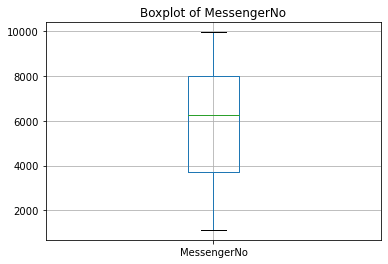

In [11]:
#Checking for any outlier messengerno by ploting a boxplot
df.boxplot(column = ['MessengerNo'])
plt.title('Boxplot of MessengerNo')

## 3 Data Wrangling
From our Date column, we will be extracting the day of the week in numerical and words for understanding the textual data in more depth. 

So, our dataset now consits of two additional columns:

* Weekday: The day of the week the text message was extracted.
* Weekdayno: The numerical form of the day of week. Where 0 represents Monday and 6 a Sunday.

In [12]:
df['Weekday'] = df['Date'].dt.day_name()
df['Weekdayno'] = df['Date'].dt.dayofweek

df.head()

,Person,Date,MessengerNo,MessengerText,App,Weekday,Weekdayno
0,A. Molina,2020-06-26 04:53:41,3305,Look,E-mail,Friday,4
1,A. Moran,2021-11-03 04:27:30,1653,just from sitting here,SMS,Wednesday,2
2,Acton Marquez,2021-07-19 03:04:55,8778,It's like ash,SMS,Monday,0
3,Adam N. Mcdowell,2021-11-21 00:05:59,9301,Uh,E-mail,Sunday,6
4,Alexander Gomez,2021-01-29 14:01:03,3457,Oh yeah,Whatsapp,Friday,4


In [13]:
#Saving the new cleaned dataset into a csv on my local pc
df.to_csv('newgriefbotdata.csv', index=False)

## 4 Exploring the Dataset
Our first approach towards understanding the dataset in more depth is to understand what how the different variables or features correlate with each other. To understand this, we will be finding the correlation value and plotting a heatmap for better understanding.

In [167]:
#Now for finding how each independent variables relate to each other we are going to find the correlation value between 
#different variables.
df.corr()

,MessengerNo,Weekdayno
MessengerNo,1.000000,-0.055452
Weekdayno,-0.055452,1.000000


From the heatmap generated below between the MessengerNo and Weekday we can infer that both of these labels have a correlation values of -0.055 with each other. The negative magnitude suggests a weak relationship meaning as the value of Weekdayno increases the number of the messages sent i.e MessengerNo decreases and vice versa. 

Thus, we can term this relationship as negatively weak.

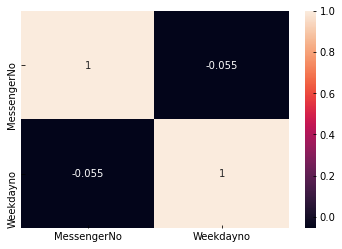

In [168]:
sns.heatmap(df.corr(), annot= True)

Secondly, we will be plotting a Kdeplot which is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether. Using the Python Seaborn module, we can build the Kdeplot with various functionality added to it. 

From our kdeplot we can state the probability distribution was at peak for messengerno's in the range of 6000 and 8000 as compared to others.

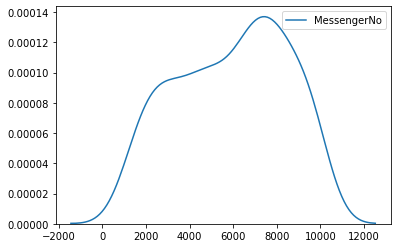

In [50]:
sns.kdeplot(df['MessengerNo'])

Nextly, to understand the distribution of our data we will be plotting histograms of all the numerical columns in our data mainly MessengerNo and Weekdayno. We have chosen a histogram because it helps in illustrating the variation in our data and the different distribution patters for each cateogory.

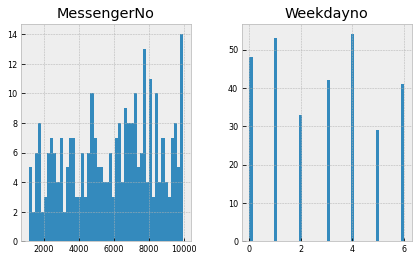

In [141]:
df.hist(figsize=(7, 4), bins=50, xlabelsize=8, ylabelsize=8);

Next, we will be plotting a distplot for plotting a histogram with a line of distribution of specifically for the column MessengerNo.

From our distribution plot, we can state the above fact true that most of the messengerno's were 8000.

(0.0, 12000.0)

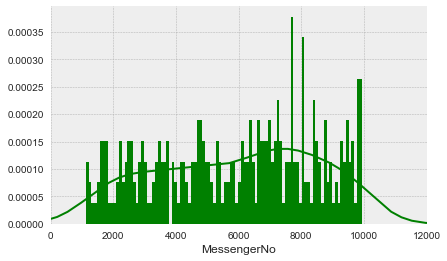

In [576]:
sns.distplot(df['MessengerNo'], color='g', bins=100, hist_kws={'alpha': 1.0})
plt.xlim([0, 12000])

Now, our aim is to understand what mediums or applications were used to gather the messages of the deceased. As from our query, we see Email, SMS and Whatsapp were the three sources used.

In [51]:
#For exploring what unique types of Apps people used for texting, we listed them using .unique().tolist().
df['App'].unique().tolist()

['E-mail', 'SMS', 'Whatsapp']

Forming a vector called df_apps which groups the data by the type of App used and gives us a count of each application.

In [47]:
#Grouping the df by the column App, using size() to count the values of each type of App used and using
#.reset_index() to generate a new column with matching index to store the values of count.
df_apps = (df.groupby(['App'])
              .size()
              .reset_index(name="n_texts"))
df_apps

,App,n_texts
0,E-mail,100
1,SMS,100
2,Whatsapp,100


From our results of df_apps vector, we can conclude that an equal of 100 users or texts were taken from each of the unique platforms. Now, for better understanding, plotting these values into a bar graph.

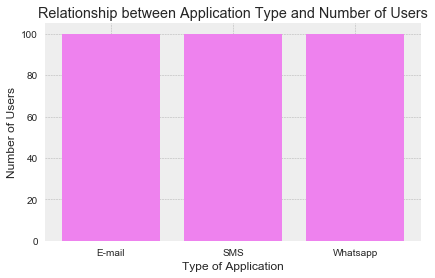

In [402]:
#Nextly, plotting a bar graph to visualize how many users were using the different applications for communicating.
#Here we can infer that the number of people using each application was 100 each.
plt.bar(df_apps.App, df_apps.n_texts, color = ['violet'])
plt.xlabel('Type of Application')
plt.ylabel('Number of Users')
plt.title('Relationship between Application Type and Number of Users')
plt.show()

Now, for learning how many number of texts were sent per weekday we will be creating a new vector called df_week which stores the number of texts sent for each week of the day.

In [55]:
#Finding the number of texts sent per weekday and arranging the weekday in names by the weekday in numerical so that our 
#weekday is listed from Monday to Sunday.
df_week = (df.groupby(['Weekdayno','Weekday'])
              .size()
              .reset_index(name="nr_texts"))
df_week

,Weekdayno,Weekday,nr_texts
0,0,Monday,48
1,1,Tuesday,53
2,2,Wednesday,33
3,3,Thursday,42
4,4,Friday,54
5,5,Saturday,29
6,6,Sunday,41


From the line graph below we can infer that Friday was the day of the week in which most number of texts were taken i.e. 54 while Saturday was the day 
with the lowest number of texts  i.e. 29.

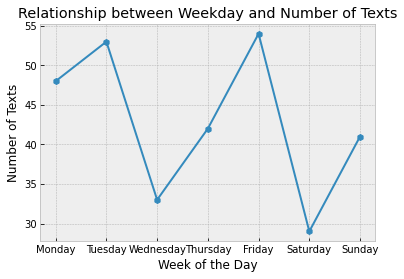

In [57]:
#Plotting the number of texts sent per weekday in a line plot below.
plt.plot(df_week.Weekday, df_week.nr_texts, marker = 'h')
plt.xlabel('Week of the Day')
plt.ylabel('Number of Texts')
plt.title('Relationship between Weekday and Number of Texts')
plt.show()
plt.style.use('bmh') #Using the theme "bmh" for plotting our graph

Subsequently, we will be finding the number of times a single word has been said in a text message. In order to do that, we have used the counter module from collections which is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.

Therefore, from the column MessengerText, we split the words and find the 10 most common words by their count of their frequency.

We will create another vector called df_wordcount which stores the 10 most common words from our df. After formation, we can see that "you" was the most used word with a count rate of 49 times while the letter "H" being the second most and "the" being the third most with a count rate of 46.

In [58]:
#Importing the counter module into our notebook and extracting the 10 most common words from our text messages.
from collections import Counter
counter = Counter(" ".join(df["MessengerText"]).split()).most_common(10)
df_wordcount = pd.DataFrame(counter, columns = ['Word', 'Count'])
df_wordcount

,Word,Count
0,you,49
1,H,47
2,the,46
3,and,38
4,know,34
5,it,31
6,I,29
7,to,26
8,a,19
9,of,19


Creating a lollipop plot to compare our categorical variables i.e. the different words used.

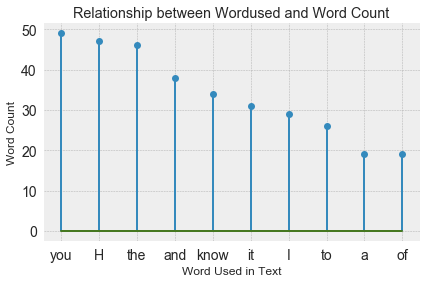

In [579]:
#Setting the use_line_collection to true to avoid any warning signs and plotting the lines as a linecollection for better understanding.
plt.stem(df_wordcount.Word, df_wordcount.Count, use_line_collection=True)
plt.xlabel('Word Used in Text')
plt.ylabel('Word Count')
plt.title('Relationship between Wordused and Word Count')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Lastly, we will be plotting a scatterplot between the Date and the MessengerNo to understand how the count of different MessengerNo varies with an increase in Date which will be grouped by for each of their type of medium used.

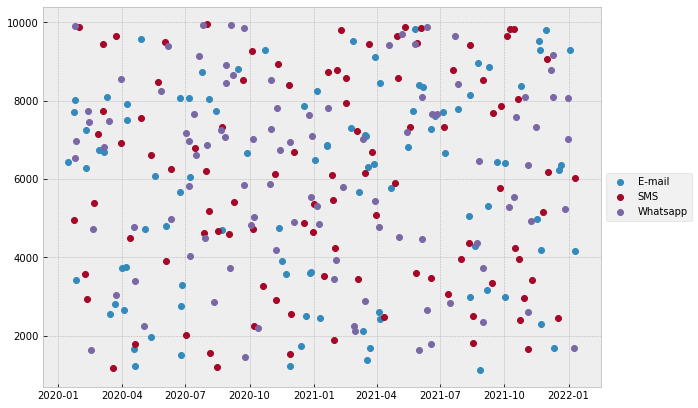

In [144]:
groups = df.groupby("App")     #Grouping the df group App column
print(groups)
fig, ax = plt.subplots(figsize=(10, 7))
#Using a for loop with the name, group in groups which stores values of each type of App and it's count.
#In the loop, plotting a scatterplot for better visualization and labels equal to the name (type of App).
for name, group in groups:
    plt.plot(group["Date"], group["MessengerNo"], marker="o", linestyle="", label=name)
#Placing the legend table outside the plot for better understanding
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Conclusions
From our analysis conducted above we can infer that:

* Our dataframe is evenly spread and has all unique values.
* The methods used to gather data are mainly E-mail, WhatsApp and SMS.
* The distribution of our MessengerNo can be highly seen for MessengerNo in the range of 6000 and 8000.
* The most used word while texting was "you".
* Friday was the week of the day on which most of the text messages were sent.
* There were equal amount of users i.e 100 users who used the mentioned platforms.

After conducting our exploratory data analysis, we have gained some insights on the sources and the type of messages which were taken of the deceased with their date and time. Although, we have some insights but gaining more data specifically related to how the application/ technology has impacted or has been in use to it's users would be a better estimate on coming to a more firm result about the performance and the social impact that the griefbot is creating. To name a few, type of feeling, number of hours spent on the griefbot, change in emotion or mood, some lifestyle data about the user would help understand the impact of the griefbot better. Additionally, since privacy should be a top priority, getting to find any pattern or similarities in how secure the data is and satisfactory rate of the users would useful labels to investigate more into the working and principles of the griefbot.